<a href="https://colab.research.google.com/github/UTKARSHSAHAREE/Utkarshsahare/blob/main/prj0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

In [76]:

data = {
    'area': [1500, 2000, 1200, 1800, 2200],
    'bedroom': [3, 4, 2, 3, 4],
    'age': [10, 5, 15, 7, 3],
    'price': [300000, 500000, 250000, 400000, 600000]
}


df = pd.DataFrame(data)

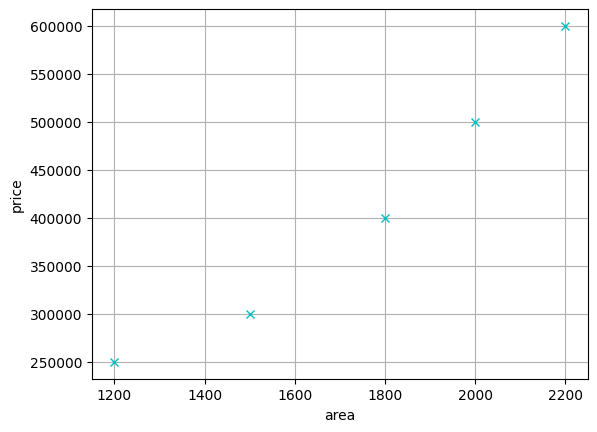

In [77]:
plt.plot(df['area'],df['price'],"cx")
plt.xlabel("area")
plt.ylabel("price")
plt.grid()
plt.show()

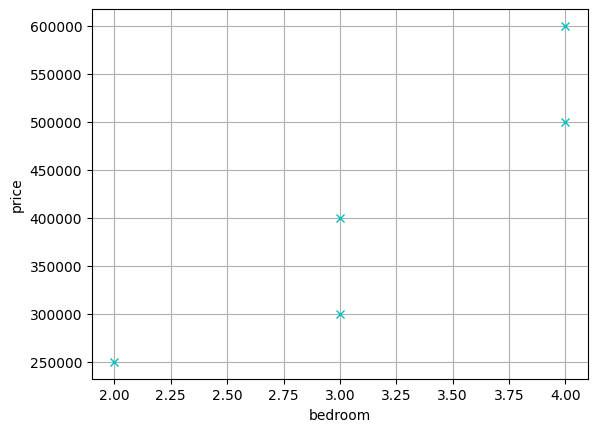

In [78]:
plt.plot(df['bedroom'],df['price'],"cx")
plt.xlabel("bedroom")
plt.ylabel("price")
plt.grid()
plt.show()

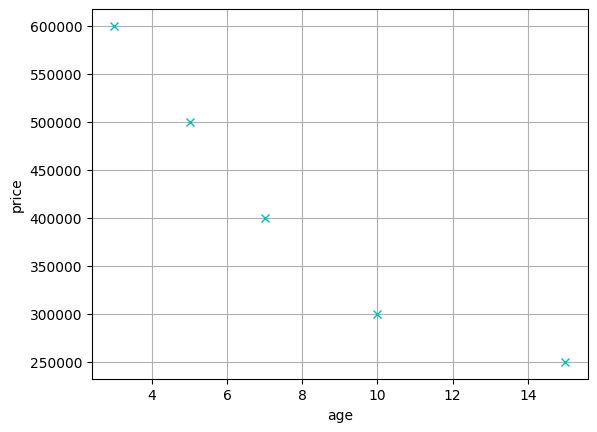

In [79]:
plt.plot(df['age'],df['price'],"cx")
plt.xlabel("age")
plt.ylabel("price")
plt.grid()
plt.show()

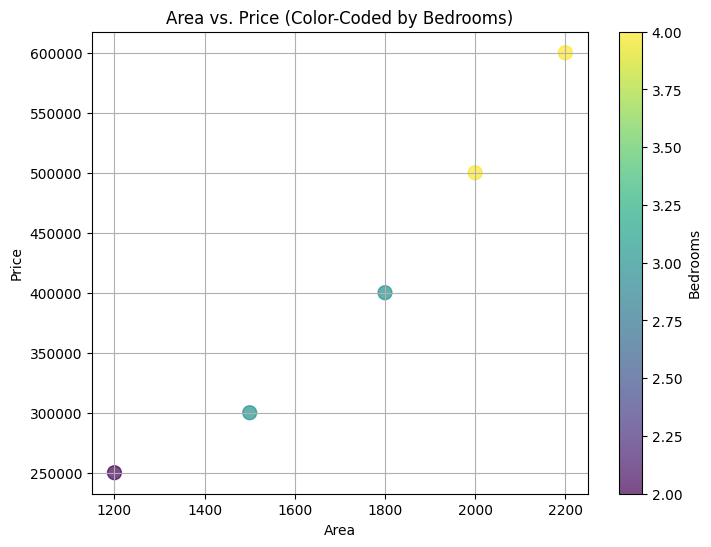

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['area'], df['price'], c=df['bedroom'], cmap='viridis', s=100, alpha=0.7)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs. Price (Color-Coded by Bedrooms)")
plt.colorbar(label="Bedrooms")
plt.grid(True)
plt.show()

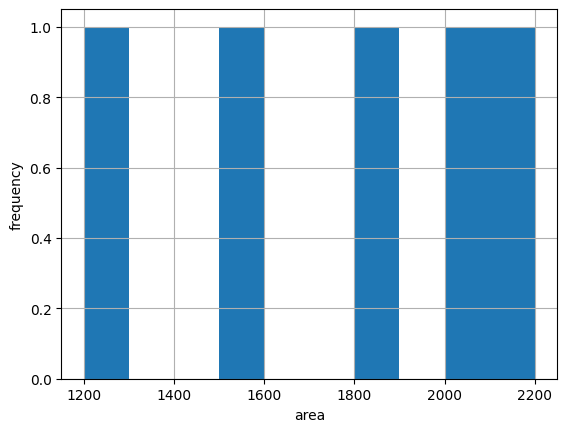

In [81]:
plt.hist(df['area'],bins=10)
plt.xlabel("area")
plt.ylabel("frequency")
plt.grid()
plt.show()

In [82]:
x=df[['area','bedroom','age']]
y=df['price']

In [83]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [84]:
x.shape
x.columns
y.name

'price'

In [85]:
x.describe

<bound method NDFrame.describe of    area  bedroom  age
0  1500        3   10
1  2000        4    5
2  1200        2   15
3  1800        3    7
4  2200        4    3>

In [88]:
param_distribution={
    'fit_intercept':[True,False],
    'copy_X':[True,False],
    'n_jobs':[1,2,3,4,5,6,7,8,9,10],
   # 'positive':[True,False]
}

result=RandomizedSearchCV(LinearRegression(),param_distributions= param_distribution,n_iter=10,cv=2
                          )

In [89]:
result.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

RandomizedSearchCV(cv=2, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10]})

In [90]:
result.best_params_

{'n_jobs': 6, 'fit_intercept': False, 'copy_X': True}

In [91]:
result.best_score_

nan

In [92]:
result.best_estimator_

LinearRegression(fit_intercept=False, n_jobs=6)

In [93]:
result.best_index_

0

In [94]:
result.cv_results_

{'mean_fit_time': array([0.00321615, 0.00302351, 0.00260878, 0.00238585, 0.00236809,
        0.00249684, 0.00261319, 0.0026139 , 0.00291181, 0.00246108]),
 'std_fit_time': array([4.60028648e-04, 2.77161598e-04, 5.05447388e-05, 2.08854675e-04,
        2.17795372e-04, 3.52025032e-04, 1.51753426e-04, 4.89950180e-05,
        9.34600830e-05, 2.60233879e-04]),
 'mean_score_time': array([0.00220084, 0.00184417, 0.00177443, 0.00166047, 0.00180185,
        0.00213349, 0.00188375, 0.00191247, 0.00181329, 0.00176299]),
 'std_score_time': array([9.65595245e-05, 1.53064728e-04, 1.16944313e-04, 1.91926956e-05,
        1.04308128e-04, 1.39832497e-04, 1.83820724e-04, 2.25305557e-05,
        1.52468681e-04, 7.40289688e-05]),
 'param_n_jobs': masked_array(data=[6, 2, 7, 3, 1, 6, 1, 3, 5, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'param_fit_intercept': masked_array(data=[False, False, False, True, False,

In [95]:
result.score(x_test,y_test)

-3.373337958145429

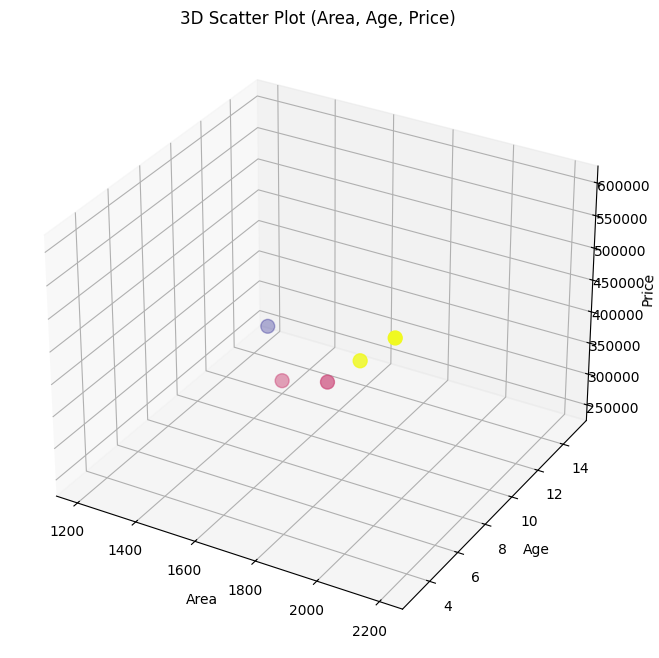

In [96]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['area'], df['age'], df['price'], c=df['bedroom'], cmap='plasma', s=100)

ax.set_xlabel("Area")
ax.set_ylabel("Age")
ax.set_zlabel("Price")
ax.set_title("3D Scatter Plot (Area, Age, Price)")

plt.show()

In [98]:
result.predict([[1800,2,15]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([440322.58064516])

In [100]:
resul1= result.predict([[1500,3,17],[1600,4,18]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


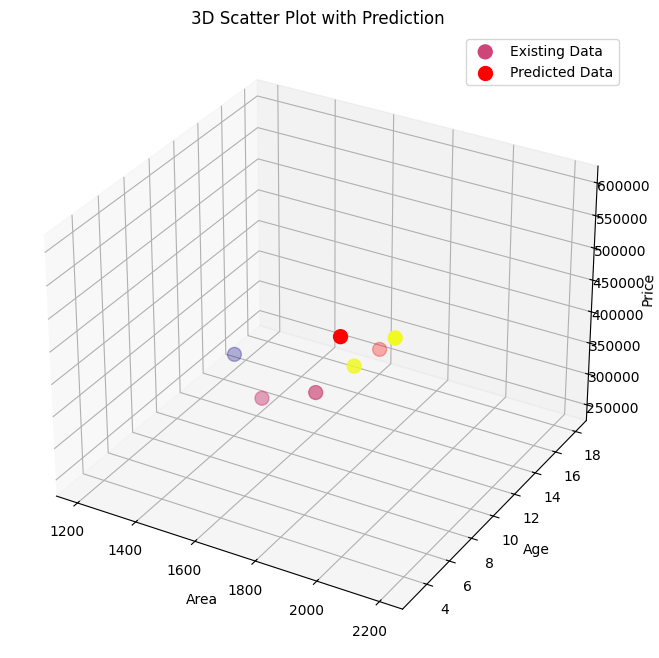

In [101]:
x1 = df['area']
x2 = df['age']
y = df['price']

new_x1 = [1500, 1600]
new_x2 = [17, 18]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y, c=df['bedroom'], cmap='plasma', s=100, label='Existing Data')

ax.scatter(new_x1, new_x2, resul1, c='red', marker='o', s=100, label='Predicted Data')

ax.set_xlabel("Area")
ax.set_ylabel("Age")
ax.set_zlabel("Price")
ax.set_title("3D Scatter Plot with Prediction")

ax.legend()

plt.show()